Name: Nguyen Gia Bao
MSSV: 22520109

In [77]:
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
import seaborn as sns
np.random.seed(22520109)


EXPERIMENT1: Tạo 03 bộ dữ liệu D1, D2, D3. Mỗi bộ dữ liệu gồm có 1 tập train gồm N=10 điểm dữ liệu và 1 tập test gồm N=10 điểm dữ liệu. Các điểm dữ liệu (x,y) có giá trị input x được phát sinh ngẫu nhiên trong khoảng (0,1) và giá trị target y = f(x)=sin(1 + x^2) + ε với ε tuân theo phân phối chuẩn N(0,σ=0.03) như trong trang 58 của slides.

Với mỗi bộ dữ liệu D1, D2, D3, sử dụng tập train để huấn luyện 9 mô hình polynomial regression có bậc (degree) từ 1-9 như trong trang 68 của slides. Các em cần plot được minh họa ghép 9 đồ thị vào trong 1 hình như trong trang 68 này.

Với bộ dữ liệu D1, tính giá trị E_in (sử dụng tập train) và E_out (sử dụng tập test) tương ứng cho 9 mô hình và tạo ra 1 bảng thống kê kết quả như trang 66 của slides. Trong file ipynb cần thể hiện bảng thống kê kết quả này.

In [78]:
#function to generate data

def gen_data(size, iloc, iscale):
    noise = np.random.normal(loc=iloc, scale=iscale, size = size*2)

    Xtrain = np.random.rand(size)
    Xtrain.sort()
    Ytrain = np.sin(1 + Xtrain**2) + noise[0:size]

    Xtest = np.random.rand(size)
    Xtest.sort()
    Ytest = np.sin(1 + Xtest**2) + noise[size:]
    
    #reshape to fit sci-kit input
    Xtrain = Xtrain.reshape(-1, 1)
    Ytrain = Ytrain.reshape(-1, 1)
    Xtest = Xtest.reshape(-1, 1)
    Ytest = Ytest.reshape(-1, 1)
    
    data = Xtrain, Ytrain, Xtest, Ytest
    return data



In [79]:
#generate data:
data1 = gen_data(10, 0, 0.03)  #D1
data2 = gen_data(10, 0, 0.03)  #D2
data3 = gen_data(10, 0, 0.03)  #D3


In [80]:
#plot data
def plotdata(D1, D2, D3):
    plt.figure(figsize = (8, 10))

    plt.xlim = 1.2
    plt.ylim = 1.5
    

    plt.subplot(3, 1, 1)
    plt.scatter(D1[0], D1[1], color='b', label='train data')
    plt.scatter(D1[2], D1[3], color='r', label='test data')
    plt.legend(loc = 'upper left')
    plt.grid()

    plt.subplot(3, 1, 2)
    plt.scatter(D2[0], D2[1], color='b', label='train data')
    plt.scatter(D2[2], D2[3], color='r', label='test data')
    plt.legend(loc = 'upper left')
    plt.grid()
    
    plt.subplot(3, 1, 3)
    plt.scatter(D3[0], D3[1], color='b', label='train data')
    plt.scatter(D3[2], D3[3], color='r', label='test data')
    plt.legend(loc = 'upper left')
    plt.grid()



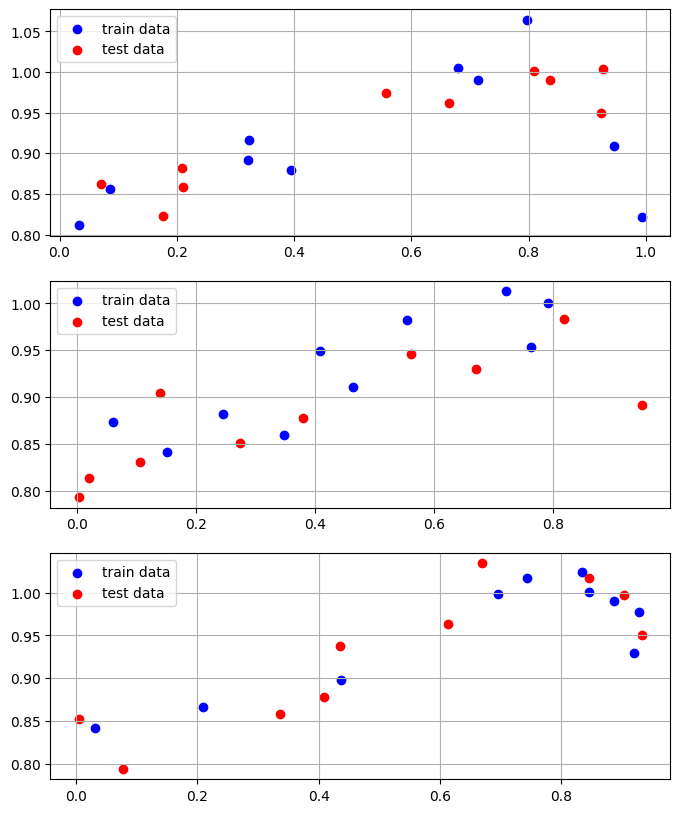

In [81]:
plotdata(data1, data2, data3)

In [82]:
def predict_(data, deg, control = 0):
    poly = PolynomialFeatures(degree = deg)

    #transform Xtrain and Xtest to fit the input format of the polynomials
    xtrain = poly.fit_transform(data[0])
    xtest = poly.fit_transform(data[2])

    #train and predict
    model = LinearRegression()
    model.fit(xtrain, data[1])

    y_pred = model.predict(xtest)
    y_train = model.predict(xtrain)
    if (control == 0):
        return y_pred
    
    return y_pred, y_train


In [83]:
def Main(data1, data2, data3):
    degrees = np.arange(1, 10)

    mse_ins = []
    mse_outs = []
    plt.figure(figsize = (16,8))
    for i, deg in enumerate(degrees):

        #predict
        y_pred1, y_train1 = predict_(data1, deg, 1)
        y_pred2 = predict_(data2, deg)
        y_pred3 = predict_(data3, deg)

        mse_ins.append(mean_squared_error(data1[1], y_train1))
        mse_outs.append(mean_squared_error(data1[3], y_pred1))

        #plot 
        plt.subplot(3, 3, i+1)
    

        #plot models
        plt.plot(data1[2], y_pred1, color = 'red')
        plt.plot(data2[2], y_pred2, color = 'green')
        plt.plot(data3[2], y_pred3, color = 'blue')


        plt.title(f'Degree {deg} polynomials')

    plt.tight_layout()
    plt.show()
    return mse_ins, mse_outs



In [84]:
#draw table of MSE
def table(mse_ins, mse_outs):
    r_mse_ins = [round(num, 7) for num in mse_ins]
    r_mse_outs = [round(num, 5) for num in mse_outs]

    tab = []


    for i in range(9):
        row = []
        row.append(degrees[i])
        row.append(r_mse_ins[i])
        row.append(r_mse_outs[i])
        tab.append(row)


    fig, ax = plt.subplots()
    first_row = ['Degree', 'E_in', 'E_out']
    col_width = [0.2] * 10
    bboxlist = [0, 0, 1, 1]

    table = ax.table(   cellText=tab, cellLoc='left', 
                        colWidths = col_width,
                        colLabels=first_row,
                        bbox = bboxlist
                )
    table.auto_set_font_size(False)
    table.set_fontsize(13)
    ax.axis('off')
    plt.show()

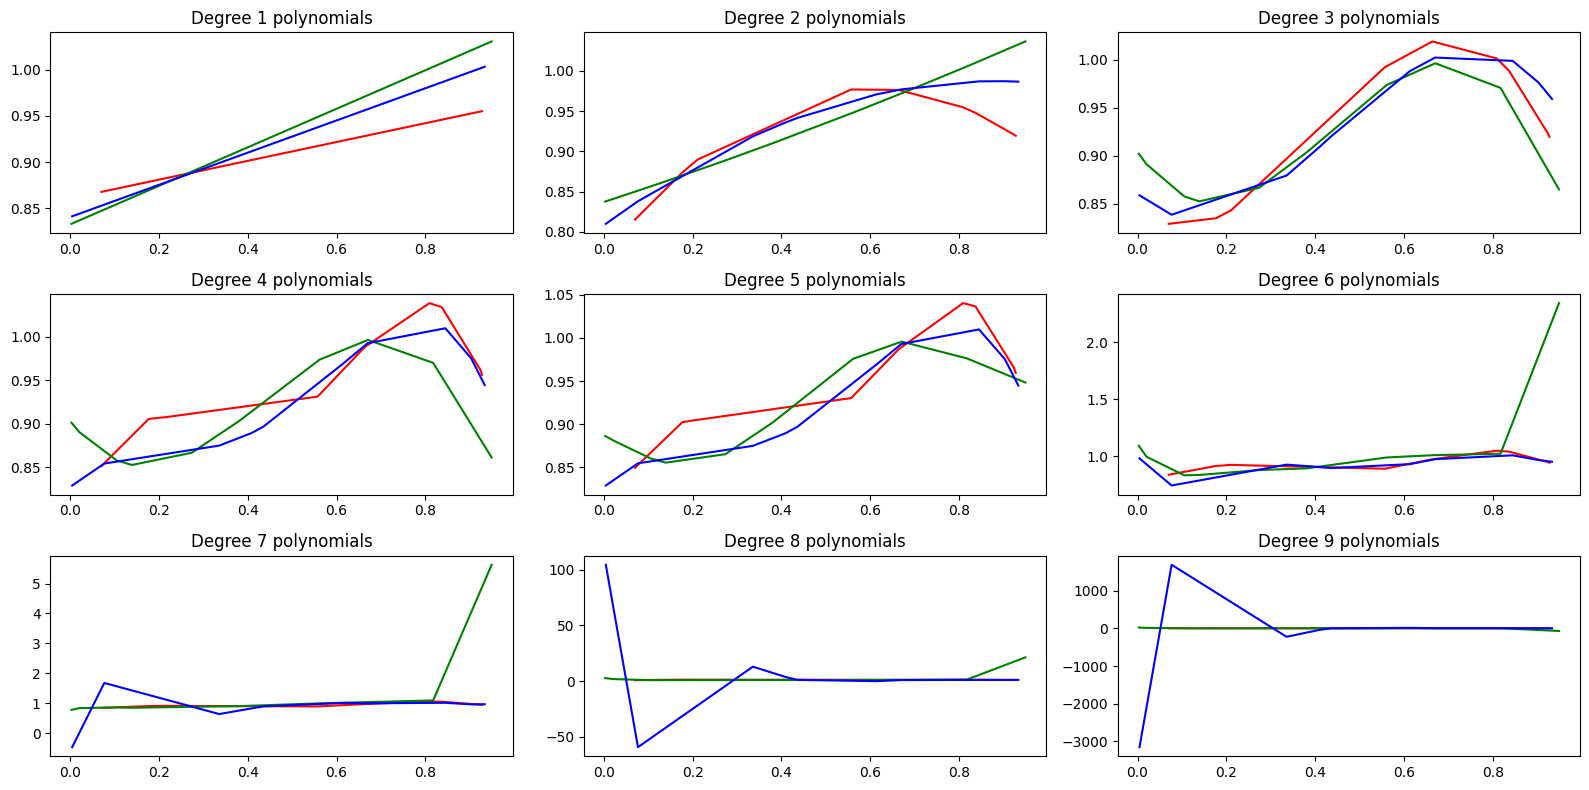

In [85]:
mse_ins, mse_outs = Main(data1, data2, data3)

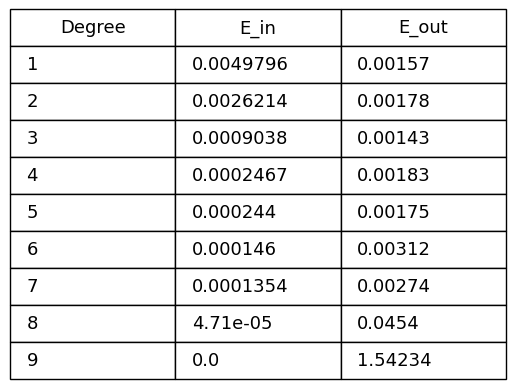

In [86]:
table(mse_ins, mse_outs)

EXPERIMENT2: Làm tương tự như Experiment 1 với N = 100 điểm dữ liệu.

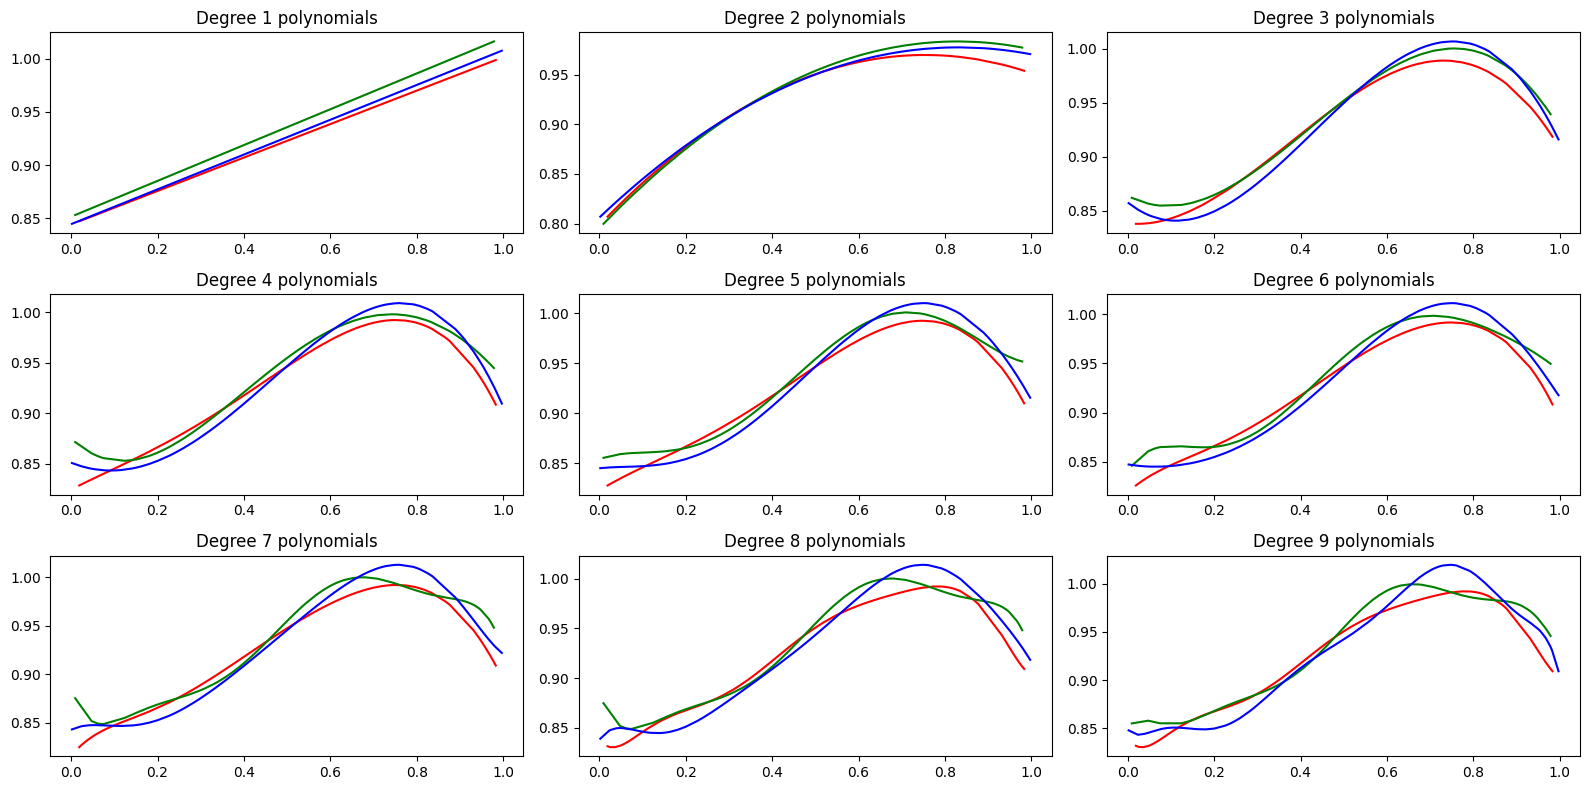

In [87]:
Ex2_data1 = gen_data(100, 0, 0.03)
Ex2_data2 = gen_data(100, 0, 0.03)
Ex2_data3 = gen_data(100, 0, 0.03)

Ex2_mse_ins, Ex2_mse_outs = Main(Ex2_data1, Ex2_data2, Ex2_data3)

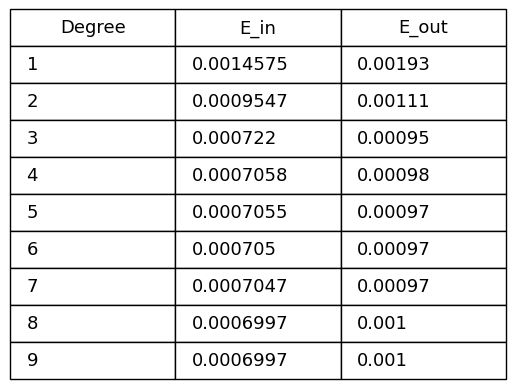

In [88]:
table(Ex2_mse_ins, Ex2_mse_outs)

EXPERIMENT 3: LÀM TƯƠNG TỰ EXPERIMENT 1 VỚI N = 100


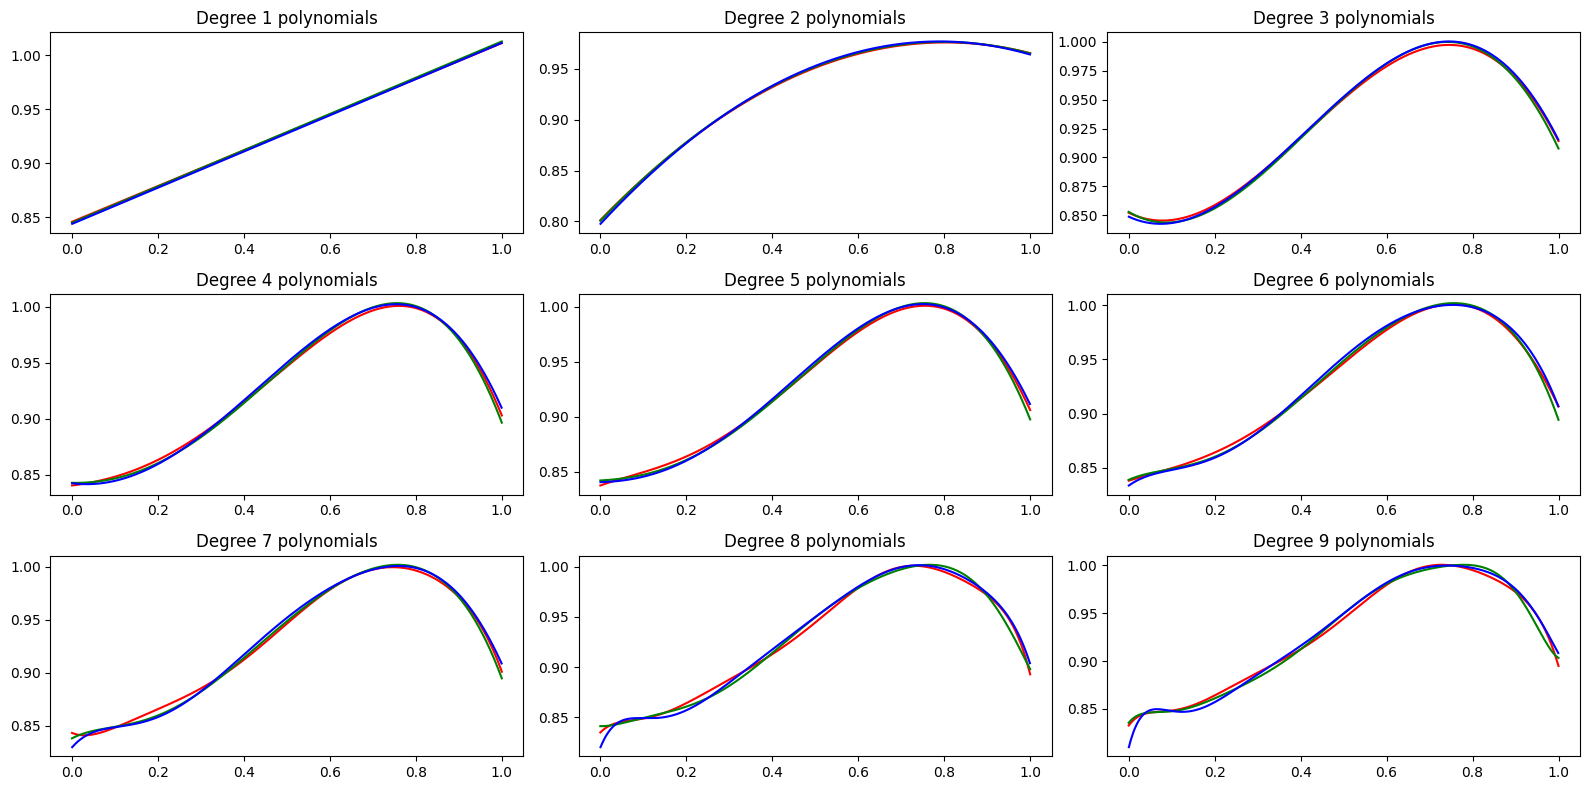

In [89]:
Ex3_data1 = gen_data(1000, 0, 0.03)
Ex3_data2 = gen_data(1000, 0, 0.03)
Ex3_data3 = gen_data(1000, 0, 0.03)

Ex3_mse_ins, Ex3_mse_outs = Main(Ex3_data1, Ex3_data2, Ex3_data3)

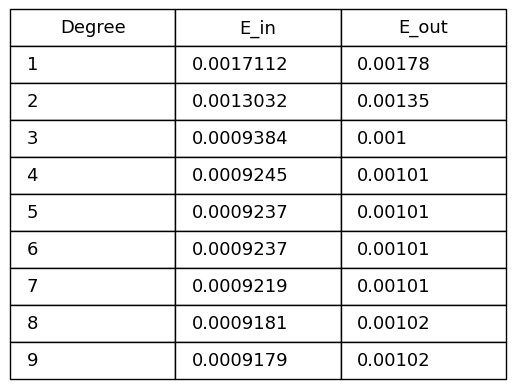

In [90]:
table(Ex3_mse_ins, Ex3_mse_outs)

TRẢ LỜI CÂU HỎI:

Câu 1: Khi tăng độ phức tạp của mô hình, bias sẽ có xu hướng giảm.

Câu 2: Khi tăng độ phức tạp của mô hình, variance sẽ tăng.

Câu 3: Khi tăng kích thước tập train, thì sẽ không ảnh hưởng đến bias.

Câu 4: Khi tăng kích thước tập train, variance sẽ giảm.